<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/YOLOv3_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from glob import glob


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import h5py
import sklearn

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
train_path = "/content/drive/My Drive/capstone_data/train_zip/train/"
test_path= "/content/drive/My Drive/capstone_data/test_zip/test/"

In [6]:
import cv2

In [2]:
weights = "./yolov3.weights"

cfg = "./yolov3.cfg"

names = "./coco.names"

In [70]:
# load the yolov3 model
net = cv2.dnn.readNet(weights, cfg)
classes = []
with open('./coco.names', 'r') as f:
    classes = f.read().splitlines()

In [184]:
# for image in images:
from os import walk

train_path = '/content/drive/My Drive/capstone_data/train_zip/train'
test_path = '/content/drive/My Drive/capstone_data/test_zip/test'

images = []
for (dirpath, dirnames, filenames) in walk(train_path):
    images.append(filenames)

In [185]:
files_dir = sorted(glob("/content/drive/My Drive/capstone_data/train_zip/train/*"))
test_dir = sorted(glob("/content/drive/My Drive/capstone_data/test_zip/test/*"))

In [186]:
test_dir[14]

'/content/drive/My Drive/capstone_data/test_zip/test/apple_84.jpg'

850 565


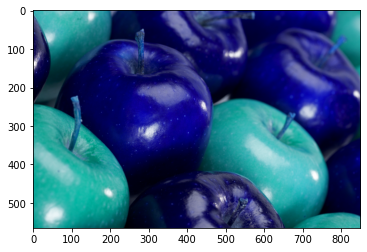

In [187]:
img = cv2.imread(test_dir[14])
width, height = img.shape[1], img.shape[0]
 
print(width, height)

plt.imshow(img)

In [194]:
path = test_path + "/" + str('apple_84.jpg')
path

'/content/drive/My Drive/capstone_data/test_zip/test/apple_84.jpg'

In [192]:
test_dir[14]

'/content/drive/My Drive/capstone_data/test_zip/test/apple_84.jpg'

In [197]:
test_dir[14][:52]

'/content/drive/My Drive/capstone_data/test_zip/test/'

In [199]:
test_dir[14][:] == path[:]

True

In [72]:
width, height = img.shape[1], img.shape[0]
blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)

net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

boxes = []
confidences = []
class_ids = []

In [76]:
# loop over the layer output
# first to extract info form the layer output
# second loop extract info from each output
for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
#      print(confidence)
    threshold = 0.5
    if confidence > threshold:
            # if confidence > 0.5 display the bbox
            # all this are normalized, we have to make it back to the original size
        center_x = int(detection[0]*width)
        center_y = int(detection[1]*height)
        w = int(detection[2]*width)
        h = int(detection[3]*height)
            # position of the upper left corner
        x = int(center_x - w/2)
        y = int(center_y - h/2)

        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.45) # threshold - maximum suppression

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [77]:
boxes

[[0, -3, 234, 242],
 [208, 0, 340, 228],
 [524, 41, 320, 326],
 [68, 84, 403, 384],
 [-5, 239, 249, 329],
 [436, 234, 327, 325],
 [745, 334, 100, 216]]

In [78]:
for i in indexes.flatten():
  x, y, w, h = boxes[i]
  print(x, y, w, h)
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
  cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)


h, w, _ = img.shape

436 234 327 325
-5 239 249 329
68 84 403 384
208 0 340 228
524 41 320 326
745 334 100 216
0 -3 234 242


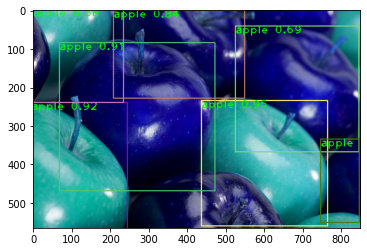

In [79]:
plt.imshow(img)

In [103]:
img

In [201]:
from tqdm import tqdm

# create submission
test_path = '/content/drive/My Drive/capstone_data/test_zip/test'
images = []
box_dict = {}
class_dict = {}
for file in test_dir:
  if "xml" not in file:
    i = file.split('/')[-1]
    images.append(i)

In [202]:
images

['apple_77.jpg',
 'apple_78.jpg',
 'apple_79.jpg',
 'apple_80.jpg',
 'apple_81.jpg',
 'apple_82.jpg',
 'apple_83.jpg',
 'apple_84.jpg',
 'apple_85.jpg',
 'apple_86.jpg',
 'apple_87.jpg',
 'apple_88.jpg',
 'apple_89.jpg',
 'apple_90.jpg',
 'apple_91.jpg',
 'apple_92.jpg',
 'apple_93.jpg',
 'apple_94.jpg',
 'apple_95.jpg',
 'banana_77.jpg',
 'banana_78.jpg',
 'banana_79.jpg',
 'banana_80.jpg',
 'banana_81.jpg',
 'banana_82.jpg',
 'banana_83.jpg',
 'banana_84.jpg',
 'banana_85.jpg',
 'banana_86.jpg',
 'banana_87.jpg',
 'banana_88.jpg',
 'banana_89.jpg',
 'banana_90.jpg',
 'banana_91.jpg',
 'banana_92.jpg',
 'banana_93.jpg',
 'banana_94.jpg',
 'mixed_21.jpg',
 'mixed_22.jpg',
 'mixed_23.jpg',
 'mixed_24.jpg',
 'mixed_25.jpg',
 'orange_77.jpg',
 'orange_78.jpg',
 'orange_79.jpg',
 'orange_80.jpg',
 'orange_81.jpg',
 'orange_82.jpg',
 'orange_83.jpg',
 'orange_84.jpg',
 'orange_85.jpg',
 'orange_86.jpg',
 'orange_87.jpg',
 'orange_89.jpg',
 'orange_90.jpg',
 'orange_91.jpg',
 'orange_92.jpg'

In [203]:
for image in tqdm(images, total=len(images)):
#     print(image)
    labels_r = []
    img = cv2.imread(test_path + "/" + str(image))
    width, height = img.shape[1], img.shape[0]
    blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []
    # loop over the layer output
    # first to extract info form the layer output
    # second loop extract info from each output
    for output in layerOutputs:
        for detection in output:
            # first four elements are the location of the bounding box
            # fifth element is the confidence
            # from sixth to end the object predictions
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
    #         print(confidence)
            threshold = 0.5
            if confidence > threshold:
                # if confidence > 0.5 display the bbox
                # all this are normalized, we have to make it back to the original size
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)
                # position of the upper left corner
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    try:
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.45) # threshold - maximum suppression

        font = cv2.FONT_HERSHEY_PLAIN
        colors = np.random.uniform(0, 255, size=(len(boxes), 3))

        for i in indexes.flatten():
            x, y, w, h = boxes[i]
#             print(x, y, w, h)
            label = str(classes[class_ids[i]])
            labels_r.append(label)
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)


        box_dict[image] = boxes
        class_dict[image] = labels_r
        
    except:
        
        box_dict[image] = []
        class_dict[image] = []

100%|██████████| 60/60 [02:31<00:00,  2.52s/it]


In [204]:
class_dict

{'apple_77.jpg': ['apple', 'apple'],
 'apple_78.jpg': ['apple'],
 'apple_79.jpg': [],
 'apple_80.jpg': ['apple'],
 'apple_81.jpg': ['apple'],
 'apple_82.jpg': [],
 'apple_83.jpg': ['apple'],
 'apple_84.jpg': ['apple',
  'apple',
  'apple',
  'apple',
  'apple',
  'apple',
  'apple'],
 'apple_85.jpg': ['apple'],
 'apple_86.jpg': ['apple', 'apple', 'apple', 'apple', 'apple'],
 'apple_87.jpg': ['apple'],
 'apple_88.jpg': [],
 'apple_89.jpg': ['apple'],
 'apple_90.jpg': ['apple'],
 'apple_91.jpg': ['apple'],
 'apple_92.jpg': ['apple'],
 'apple_93.jpg': ['apple'],
 'apple_94.jpg': ['apple', 'apple', 'apple', 'apple', 'apple', 'diningtable'],
 'apple_95.jpg': ['apple', 'apple', 'apple', 'apple'],
 'banana_77.jpg': ['banana'],
 'banana_78.jpg': [],
 'banana_79.jpg': [],
 'banana_80.jpg': ['banana'],
 'banana_81.jpg': ['banana'],
 'banana_82.jpg': ['banana'],
 'banana_83.jpg': ['bowl'],
 'banana_84.jpg': ['banana'],
 'banana_85.jpg': ['banana'],
 'banana_86.jpg': ['banana', 'banana'],
 'banana

**Programming Exercises**

In [ ]:
def merge(a,b):
  for i in b:
    a.append(i)
  return a

def rest(a):
  return a[1:]

def first(a):
  return a[0]

def wap(a,b):
  if len(a)==0:
    return a
  if len(b)==0:
    return a
  if a[0]<b[0]:
    return merge(first(a), wap(rest(a),b))
  else:
    return merge(first(b), wap(a,rest(b)))


In [ ]:
a = [1,2]

b = [1,3,4]


wap(a,b)

TypeError: ignored

In [ ]:
b = [1,2]

for i in b:
  print(i)

1
2


In [ ]:
def jam(a):
  z=a[0]
  i=0
  while i < len(a):
    if z<a[i]:
      z = a[i]
    i += 1
  return z

a = [3,2,1]

jam(a)

3

In [ ]:
def maximumToys(prices, k):
    # Write your code here
    sorted_prices = sorted(prices)
    price_sum = 0
    count = 0
    for i in sorted_prices:
      if (price_sum+i) <=k:
        price_sum += i
        count += 1

    return count




In [ ]:
maximumToys([1,12, 5, 111, 200,1000,10],50)

4

In [ ]:
def fun(z):
  if z==0:
    return 0
  return bun(z-1)+1

def bun(z):
  return 2*fun(z-1)

bun(3)

2

In [ ]:
def wump(n):
  if n ==1:
    return 1
  return wump(n/2)+n

In [ ]:
wump(4)

7.0

In [ ]:
def v(d):
  p = 0
  q=d[0]
  while p < (len(d)-1):
    d[p] = d[p+1]
    p += 1
  if p == len(d):
    temp = d[0]
    d[0] = d[len(d)-1]
    d[len(d)-1] = temp
  d[len(d)-1] = q
  return d

In [ ]:
d = [7,1,3,14]
v(d)

[1, 3, 14, 7]

In [ ]:
def u(a):
  a[a[2]] = a[a[a[1]]]
  return a[0]+a[1]

In [ ]:
a = [3,2,1]

u(a)

5

In [ ]:
def f(a):
  i = 1
  while i < len(a):
    a[i] = a[i-1] + a[i]
    i = i+ 1

  return sum(a)

In [ ]:
a = [1,1,1]

f(a)

6